In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [3]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [ ]:
#df_events.columns

In [ ]:
#df_events.head()


In [4]:
models = df_events.loc[df_events["storage"].isnull() == False,:]
models = models[["model","storage","event","color"]]
models = models.loc[models["event"] == "conversion" ,:]
models.head()

,model,storage,event,color
220,Motorola Moto X2,32GB,conversion,Couro Vintage
2282,Samsung Galaxy Core Plus Duos TV,4GB,conversion,Branco
2547,Samsung Galaxy S6 Flat,32GB,conversion,Branco
4245,iPhone 5s,32GB,conversion,Cinza espacial
6985,Samsung Galaxy J5,16GB,conversion,Preto


In [ ]:
models.count()

# Cantidad de compras para los distintos tipos de alamacenamiento interno

In [ ]:
storage = models["storage"].value_counts()
storage.index = [16,32,64,8,128,4,256,0.512]
storage = storage.sort_index()
#storage.index = ["256GB","128GB","64GB","32GB","16GB","8GB","4GB","512MB"]
storage

In [ ]:
ax = storage.plot(kind = 'bar', title = "Cantidad de compras vs Almacenamiento interno",figsize =(10,8),legend = False, fontsize = 12)
ax.set_xlabel("Almacenamiento interno", fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
ax.set_xticklabels(["512MB","4GB","8GB","16GB","32GB","64GB","128GB","256GB"])
plt.show()

# Modelos más comprados

In [ ]:
model = models["model"].value_counts()
model = model.head(20)
model.head(20)

In [ ]:
ax = model.plot(kind = 'barh', title = "Models vs compras",figsize =(10,8),legend = False, fontsize = 10)
ax.set_xlabel("Cantidad de compras",fontsize = 18)
ax.set_ylabel("Modelos",fontsize = 18)
plt.show()

# Distintos colores por cantidad de compras  

In [14]:
color = models["color"].value_counts()
color = color.head(30)
color

Preto               368
Dourado             269
Branco              216
Cinza espacial       89
Prateado             51
Ouro Rosa            32
Rosa                 30
Cinza                23
Azul                 22
Preto Vermelho       11
Prata                 8
Platinum              7
Branco Vermelho       6
Preto Matte           6
Ouro                  4
Ametista              4
Titânio               4
Indigo                3
Amarelo               2
Cabernet              2
Vermelho              2
Bambu                 2
Preto Azul            1
Azul Topázio          1
Couro Vintage         1
Cobre                 0
Branco Framboesa      0
Branco Verde          0
Branco Pink           0
Couro Marrom          0
Name: color, dtype: int64

colores = {"Preto" : "Negro", "Dourado" : "Dorado", "Cinza espacial" : "Negro", "Branco": "Blanco", "Prateado" : "Plata", "Ouro Rosa" : "Rosa", "Prata" : "Plata", "Rosa" : "Rosa",
          "Preto Matte": "Negro", "Platinum" :"Plata", "Cinza" : "Plata", "Azul": "Azul", "Ametista": "Otros", "Ouro": "Dorado", "Preto Brilhante" : "Negro", "Vermelho": "Otros",
          "Bambu":"Otros","Preto Vermelho": "Negro","Titânio": "Otros", "Verde": "Otros", "Branco Vermelho" : "Blanco", "indigo": "Otros", "Amarelo": "Otros", "Cabernet": "Otros", 
          "Couro Vintage": "Otros", "Azul Topázio": "Azul"}



In [15]:
colores = {"Preto" : "Negro", "Dourado" : "Dorado", "Branco" : "Blanco", "Cinza espacial" : "Negro", "Prateado" : "Plata", "Ouro Rosa" : "Rosa",
"Rosa": "Rosa", "Cinza" : "Plata", "Azul" : "Azul", "Preto Vermelho" : "Negro", "Prata" : "Plata", "Platinum" : "Plata", "Preto Matte" : "Negro",
"Branco Vermelho" : "Blanco", "Ouro" : "Dorado", "Titânio" : "Plata", "Ametista" : "Otros", "Preto Brillhante" : "Negro", "Indigo" : "Otros",
"Amarelo" : "Otros", "Vermelho" : "Otros", "Bambu" : "Otros", "Cabernet" : "Otros", "Preto Azul" : "Negro", "Couro Vintage" : "Otros", "Azul Topázio" : "Azul"}

models["in_color"] = models['color'].apply(lambda x: colores.get(x, 'Basura'))

models = models.loc[models['in_color'] != 'Basura']
colores = models['in_color'].value_counts()
colores


Negro     475
Dorado    273
Blanco    222
Plata      93
Rosa       62
Azul       23
Otros      16
Name: in_color, dtype: int64

In [16]:
#colores = {"Negro": color["Preto"] + color["Cinza espacial"] + color["Preto Matte"] + color["Preto Brilhante"] ,
#           "Plata": color["Prateado"] + color["Prata"] + color["Platinum"] + color["Cinza"] + color["Titânio"] ,
#           "Dorado": color["Ouro"] + color["Dourado"],
#            "Rosa": color["Ouro Rosa"] + color["Rosa"],
#           "Azul": color["Azul"], "Otros" : color["Ametista"] + color["Vermelho"] +  color["Bambu"] +  color["Preto Vermelho"] + color["Verde"]}
#colores

#plt.bar(range(len(colores)), list(colores.values()))
#plt.xticks(range(len(colores)), list(colores.keys()))
         

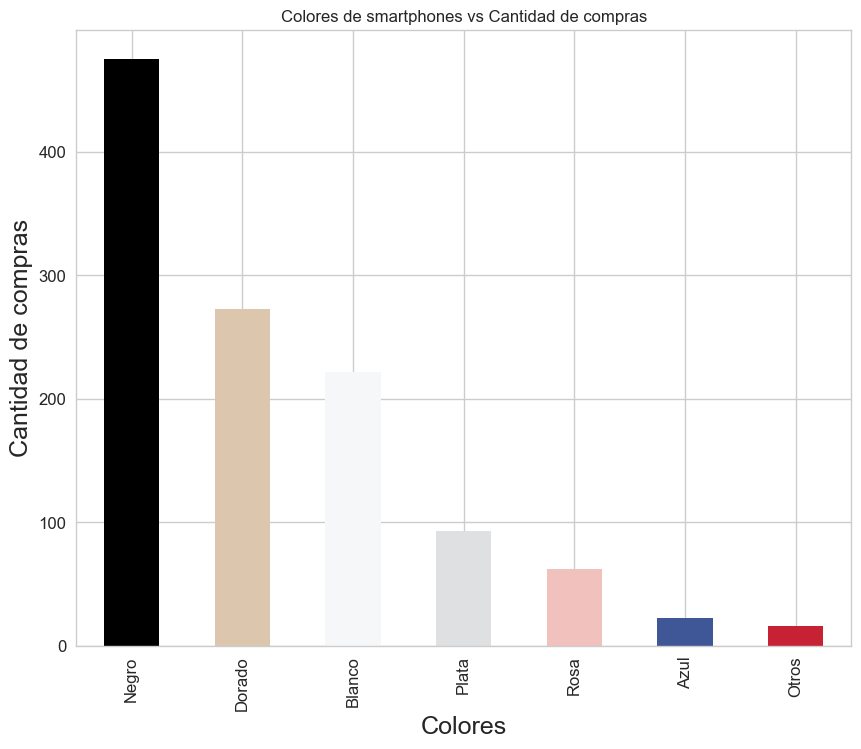

In [17]:
ax = colores.plot(kind = 'bar', title = "Colores de smartphones vs Cantidad de compras",figsize =(10,8),legend = False, fontsize = 12,color = [["#000000","#DCC6AE","#F6F7F9","#DFE0E2","#F1C1BD" ,"#3F5796","#C72233"]])
ax.set_xlabel("Colores",fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)

plt.show()

## No se puede ver el color sefun pais, debido que no hay datos del mismo

models = df_events.loc[df_events["color"].isnull() == False,:]
models = models[["model","storage","event","color",'country']]
models = models.loc[models["event"] == "checkout" ,:]
models.head()

#models2 = models.loc[models['country'].isnull() == False,:]
#models2
models.count()